<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/master/pythonProject/SVM/iris_dataset_pca_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(1)

In [231]:
df=pd.read_csv('Iris.csv')
label=df['Species'].to_numpy()

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [233]:
#drop Id column
#df.drop('Id',axis=1,inplace=True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [234]:
train_set=df.iloc[:,[0,1,2,3]]
#convert to numpy
train_set=train_set.to_numpy()
train_set.shape
# 150 datapoint, each datapoint has 4 features

(150, 4)

In [235]:
# Reduce dimension into 2 dim and visualize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
f = plt.figure()
f.set_figwidth(100)
f.set_figheight(100)
def standardized(dataset):
    scaler = StandardScaler()
    scaler.fit(dataset)
    dataset = scaler.transform(dataset)
    return dataset
def pca(data,num):
    pca = PCA(n_components=num) # 95% of variance equal to 330 Principal component
    pca.fit(data)
    data = pca.transform(data)
    print(np.sum(pca.explained_variance_ratio_) )
    return data
def split(data):
    data=np.array(data).T
    x=data[0]
    y=data[1]
    return x,y
def present(x,y):
    plt.plot(x, y, 'o')
def run(x):
    x=standardized(x)
    data=pca(x,2)
    x,y=split(data)
    return data

<Figure size 7200x7200 with 0 Axes>

In [236]:
data=run(train_set)
data.shape

0.9318211437893082


(150, 2)

In [237]:
label=label.reshape(150,1)

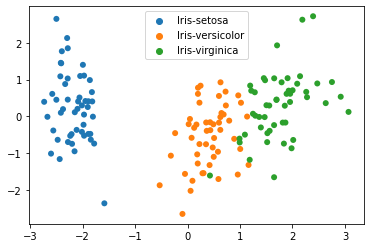

In [238]:
#add label and visualize
import seaborn as sns
data_label=np.hstack((data,label))
sns.scatterplot(x=data_label[:,0], y=data_label[:,1], hue=data_label[:,2], ec=None)

In [239]:
X=data
y=label.reshape(150,)
for x in range(len(y)):
  if y[x]=='Iris-setosa':
    y[x]=0
  elif y[x]=='Iris-versicolor':
    y[x]=1
  elif y[x]=='Iris-virginica':
    y[x]=2
y=y.astype('int64')
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [240]:
def svm_loss_vectorized(W, X, y, reg):
    d, C = W.shape 
    _, N = X.shape 
    loss = 0 
    dW = np.zeros_like(W)
    
    Z = W.T.dot(X)     
    
    correct_class_score = np.choose(y, Z).reshape(N,1).T
    margins = np.maximum(0, Z - correct_class_score + 1) 
    margins[y, np.arange(margins.shape[1])] = 0.
    loss = np.sum(margins, axis = (0, 1))
    loss /= N 
    loss += 0.5 * reg * np.sum(W * W)
    
    F = (margins > 0).astype(int)
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0)
    dW = X.dot(F.T)/N + reg*W
    return loss, dW

In [241]:
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, \
        batch_size = 100, num_iters = 1000, print_every = 100):
    W = Winit 
    loss_history = np.zeros((num_iters))
    for it in range(num_iters):
        # randomly pick a batch of X
        idx = np.random.choice(X.shape[1], batch_size)
        X_batch = X[:, idx]
        y_batch = y[idx]

        loss_history[it], dW = \
            svm_loss_vectorized(W, X_batch, y_batch, reg)

        W -= lr*dW 
        # if True:
        #     print ('it %d/%d, loss = %f' \
        #         %(it, num_iters, loss_history[it]))

    return W, loss_history 
def predict(X,W):
  Z = W.T.dot(X)
  Z=Z.T
  r=[]
  for x in Z:
    r.append(np.argmax(x,axis=0))
  count=0
  for m in range(0,150):
    if r[m]==y[m]:
      count+=1
  score=(count/150)
  return score,r
def run(X,y,Winit,iter,reg,lr):
  W, loss_history =multiclass_svm_GD(X, y, Winit, reg, lr=lr, \
        batch_size = 1, num_iters =iter, print_every = 10)
  score,r=predict(X,W)
  return [score,loss_history,r]

In [242]:
def highest(X,y,W,iter,reg,lr):
  score=[]
  for x in range(1,iter):
    m=run(X,y,W,iter,reg,lr)
    score.append((m,x))
  max=0
  g=np.array(score)
  for x in range(0,iter-1):
    if max < g[x][0][0]:
      max=g[x][0][0]
  for x in range(0,iter-1):
    if max == g[x][0][0]:
      print(f'max score is {g[x][0][0]}')
      #print(f'predict label {g[x][0][2]}')

      print(f'loss history if iter ={g[x][1]} is: ')
      # for j in g[x][0][1]:
      #   print(j)

In [243]:
W=np.random.randn(3, 3)*0.0001 # 3 feature, with 1 feature is b
one=np.empty((150,1))
one.fill(1)
X=np.hstack((X,one))
highest(X.T,y,W,30,0.1,0.01)

max score is 0.9466666666666667
loss history if iter =28 is: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


In [244]:
x1=standardized(train_set)
one=np.empty((150,1))
one.fill(1)
x1=np.hstack((x1,one))
W0=np.random.randn(5, 3)*0.00001 # 5 feature, 3 class
highest(x1.T,y,W0,30,0.1,0.01)

max score is 0.98
loss history if iter =23 is: 
max score is 0.98
loss history if iter =24 is: 
max score is 0.98
loss history if iter =26 is: 
max score is 0.98
loss history if iter =28 is: 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys
